# Importer les données

Exécutes les cellules ci-dessous pour récupérer les tables de données.

In [ ]:
import requests #http requests
import zipfile 
import sqlite3  #SQL
import pandas as pd

# Ici, nous téléchargeons le fichier de GitHub 
r = requests.get('https://github.com/murpi/olist/blob/master/olist.sqlite.zip?raw=true')
open('olist.sqlite.zip', 'wb').write(r.content)

# Puis on le décompresse
with zipfile.ZipFile("olist.sqlite.zip","r") as zip_ref:
    zip_ref.extractall()

# Nous nous connectons à la base de données
conn = sqlite3.connect('olist.sqlite')



In [ ]:
# Voici une requête spécifique pour lister le nom des tables
cursor = conn.cursor()
schema = cursor.execute("SELECT * FROM sqlite_master where type='table'").fetchall()
pd.DataFrame(schema, columns = ["type", "name", "table_name", "rootpage", "SQL"])

,type,name,table_name,rootpage,SQL
0,table,customers_dataset,customers_dataset,2,"CREATE TABLE ""customers_dataset"" (\n\t""custome..."
1,table,product_category_name_translation,product_category_name_translation,2236,"CREATE TABLE ""product_category_name_translatio..."
2,table,sellers_dataset,sellers_dataset,2237,"CREATE TABLE ""sellers_dataset"" (\n\t""seller_id..."
3,table,products_dataset,products_dataset,2282,"CREATE TABLE ""products_dataset"" (\n\t""product_..."
4,table,orders_dataset,orders_dataset,2859,"CREATE TABLE ""orders_dataset"" (\n\t""order_id""\..."
5,table,order_reviews_dataset,order_reviews_dataset,7391,"CREATE TABLE ""order_reviews_dataset"" (\n\t""rev..."
6,table,order_payments_dataset,order_payments_dataset,11053,"CREATE TABLE ""order_payments_dataset"" (\n\t""or..."
7,table,order_items_dataset,order_items_dataset,12645,"CREATE TABLE ""order_items_dataset"" (\n\t""order..."
8,table,geolocation_dataset,geolocation_dataset,16680,"CREATE TABLE ""geolocation_dataset"" (\n\t""geolo..."


In [ ]:
# Et maintenant nous pouvons afficher avec Pandas le résultat de n'importe quelle requête
# Par exemple :
pd.read_sql("select * from geolocation_dataset ", conn)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:
customers_dataset_sql = pd.read_sql("select * from customers_dataset", conn)
customers_dataset_sql

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


# Semaine 2 : Organisation ("tables intermédiaires")

Avant de répondre à la demande du PDG d'Olist, nous devons rechercher les causes d'un mauvais `review_score`.

Une bonne pratique pour ce genre de problème est de construire plusieurs tables intermédiaires, chacune contenant un unique_id et les informations pertinentes pour cette table.  

Par exemple :

* table des commandes (id, review_score, montant, distance entre le vendeur et le client...)
* table des vendeurs (id, note moyenne par vendeur, temps d'attente moyen, ...)
* table des produits : (id, score moyen d'avis, catégories, couleurs, tailles...)
* table des clients (id, quelques propriétés de ce client)
* table des avis (id, texte traduit, propriétés de ce texte...)

Une fois que tu sera satisfait de tes tables intermédiaires imaginés, tu pourras dans un premier temps exporter les tables de données .sql en fichier .csv, avant de les créer avec le langage Pandas. Tu fera ensuite ton analyse en te servant de ces tables intermédiaires.





# Idées tables intermédiaires


Dans un premier temps, réfléchis avec ton groupe en observant le schéma de la base de données que tu as fait plus haut. Quelles sont les tables intermédiaires à créer pour proposer une analyse consise et pertinente en s'appuyant sur ses dernières ?
Vous pouvez, individuellement ou en groupe, réfléchir à ses tables intermédiaires.
Lundi matin, nous échangerons tous ensemble sur vos idées de tables intermédiaires.


In [ ]:
#Les vendeurs avec le plus de volume de ventes ont-ils des meilleures critiques ?

In [ ]:
order_items=pd.read_sql("select * from order_items_dataset ", conn)
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
sellers = pd.read_sql("select * from sellers_dataset", conn)
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
order_reviews=pd.read_sql("select * from order_reviews_dataset", conn)
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11566 non-null  object
 4   review_comment_message   40950 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_items['seller_id'].duplicated().value_counts()

True     109555
False      3095
Name: seller_id, dtype: int64

In [ ]:
sum(order_items['order_id'].duplicated())

13984

In [ ]:
x=pd.merge(order_items, sellers, how="inner", on='seller_id')
x

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,27277,volta redonda,SP
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,27277,volta redonda,SP
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,27277,volta redonda,SP
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,27277,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...
112645,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,franca,SP
112646,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,curitiba,PR
112647,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
112648,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,sao paulo,SP


In [ ]:
y=pd.merge(x, order_reviews, how="inner", on='order_id')
y

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,97ca439bc427b48bc1cd7177abe71365,5,None,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,27277,volta redonda,SP,1fac9acb29e014e3b9b393d5c8505f99,5,None,ÓTIMO,2017-07-29 00:00:00,2017-08-01 20:55:50
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,27277,volta redonda,SP,2eab04a8f45efa131d44cf58b37ab595,5,None,Recebi o patines em perfeitas condições bem an...,2017-08-25 00:00:00,2017-08-28 12:57:25
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,27277,volta redonda,SP,9d0e152a1983460f059ddffcb8af03bb,5,None,None,2017-10-20 00:00:00,2017-10-20 23:45:27
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,27277,volta redonda,SP,f4fad24d4bb3462bab004be9a0b753f0,4,None,"Atendimento excelente,o produto chegou antes d...",2017-07-11 00:00:00,2017-07-13 23:18:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.90,16.14,80220,curitiba,PR,fd48db39884359395ff6f18c8822aa7b,4,None,None,2017-05-25 00:00:00,2017-05-26 11:42:36
112368,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,franca,SP,63fedff4710feb37d0a2f8ba28187cb2,4,None,None,2017-03-15 00:00:00,2017-03-20 13:29:17
112369,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,curitiba,PR,cd6f089e896732c91671704c7f51790e,4,None,None,2017-08-18 00:00:00,2017-08-19 13:16:38
112370,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,sao paulo,SP,2926f21f2f2aba2ce11d801e17eac783,5,None,None,2018-04-21 00:00:00,2018-04-24 14:13:18


In [ ]:

product=y.groupby("seller_id")["product_id"].count().sort_values(ascending=False)
product=pd.DataFrame(product)
product

,product_id
seller_id,
6560211a19b47992c3666cc44a7e94c0,2020
4a3ca9315b744ce9f8e9374361493884,1984
1f50f920176fa81dab994f9023523100,1932
cc419e0650a3c5ba77189a1882b7556a,1811
da8622b14eb17ae2831f4ac5b9dab84a,1568
...,...
50a7e551a7b3f8d37cd6e32d8bfbe5ea,1
77128dec4bec4878c37ab7d6169d6f26,1
651530bf5c607240ccdd89a30c9c9712,1


In [ ]:
score=y.groupby("seller_id")["review_score"].mean()
score=pd.DataFrame(score)
score

,review_score
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,3.666667
001cca7ae9ae17fb1caed9dfb1094831,3.902542
001e6ad469a905060d959994f1b41e4f,1.000000
002100f778ceb8431b7a1020ff7ab48f,3.982143
003554e2dce176b5555353e4f3555ac8,5.000000
...,...
ffcfefa19b08742c5d315f2791395ee5,1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000
ffeee66ac5d5a62fe688b9d26f83f534,4.214286


In [ ]:
volum=pd.merge(product, score, how='inner', on='seller_id')
volum


,product_id,review_score
seller_id,,
6560211a19b47992c3666cc44a7e94c0,2020,3.909406
4a3ca9315b744ce9f8e9374361493884,1984,3.803931
1f50f920176fa81dab994f9023523100,1932,3.982402
cc419e0650a3c5ba77189a1882b7556a,1811,4.069575
da8622b14eb17ae2831f4ac5b9dab84a,1568,4.071429
...,...,...
50a7e551a7b3f8d37cd6e32d8bfbe5ea,1,5.000000
77128dec4bec4878c37ab7d6169d6f26,1,5.000000
651530bf5c607240ccdd89a30c9c9712,1,4.000000


In [ ]:
volum.rename(columns = {'product_id': 'products_seles', 'review_score': 'mean_review_score'}, inplace=True)

In [ ]:
volum.corr()  #pas de correlation

,products_seles,mean_review_score
products_seles,1.000000,0.018578
mean_review_score,0.018578,1.000000


In [ ]:
volum.to_csv('volum_score')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#plot = volum.plot.pie(y='review_score', figsize=(5, 5))
#plt.show()


In [ ]:
# Analyse des notes
note=pd.DataFrame((order_reviews['review_score'].value_counts()/(order_reviews['review_score']).count())*100)
note


,review_score
5,57.776344
4,19.291704
1,11.513344
3,8.242965
2,3.175643


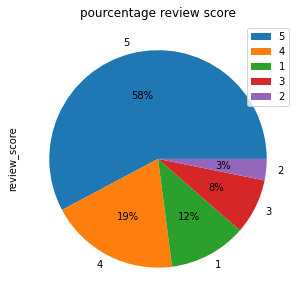

In [ ]:
plot = note.plot.pie(y='review_score', figsize=(5, 5),autopct='%1.0f%%', title='pourcentage review score')
plt.show()

In [ ]:
# Quelles catégories ont le plus fort taux de notes supérieures ou égales à 4, parmi les catégories ayant plus de 200 reviews

In [ ]:
products=pd.read_sql("select * from products_dataset ", conn)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
trans = pd.read_sql("select * from product_category_name_translation", conn)
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
trans_pro=pd.merge(trans, products, how='inner', on='product_category_name')
trans_pro

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0
...,...,...,...,...,...,...,...,...,...,...
32323,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,2b18330ce86ae5c606250b75b499f370,42.0,277.0,3.0,120.0,19.0,11.0,15.0
32324,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,28ac6af4008a402e5039f3e042a36e13,48.0,488.0,5.0,500.0,36.0,10.0,26.0
32325,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0
32326,seguros_e_servicos,security_and_services,8db75af9aed3315374db44d7860e25da,48.0,461.0,4.0,400.0,26.0,22.0,11.0


In [ ]:
trans_pro.to_csv('produit_tradu')

In [ ]:
pro_ord=pd.merge(trans_pro,order_items, how='inner', on='product_id')

In [ ]:
pro_score=pd.merge(pro_ord,order_reviews, on='order_id')
pro_score

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,...,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,e40a00338817a7127bfbf45220c30e8c,4,None,None,2017-05-20 00:00:00,2017-05-21 11:38:19
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,...,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22,77bb6629f429afe0121776a1bba4f65f,5,None,None,2018-03-15 00:00:00,2018-03-16 03:26:29
2,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,...,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18,f3d50350bb91071856a1aa302d58c32d,4,None,None,2017-08-11 00:00:00,2017-08-15 11:41:14
3,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,...,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11,b5425a02e3804ec8cb2ef00f95cc501c,5,None,None,2018-02-22 00:00:00,2018-04-28 21:25:23
4,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,...,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64,d922c55fb82c5a62ceb8964747620fa5,5,None,None,2018-08-22 00:00:00,2018-08-25 03:35:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110745,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,2b18330ce86ae5c606250b75b499f370,42.0,277.0,3.0,120.0,19.0,11.0,15.0,...,7fe21dd00d2f4943ae09525efa2fd674,2017-08-14 04:10:13,49.90,16.79,84dd398af6cf56be0bd7eba2f4df3050,1,None,None,2017-09-03 00:00:00,2017-09-07 09:55:18
110746,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,28ac6af4008a402e5039f3e042a36e13,48.0,488.0,5.0,500.0,36.0,10.0,26.0,...,28ea411b354f14b1a494be4e79f0ce02,2017-06-15 18:20:19,110.00,8.96,8971b7fb284ee499968c946e51d802a0,5,None,None,2017-06-14 00:00:00,2017-06-24 21:30:07
110747,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0,...,d98eec89afa3380e14463da2aabaea72,2017-10-16 01:17:50,39.99,14.10,549f0948d29acee5033f72e52f07dc8e,5,None,None,2017-10-17 00:00:00,2017-10-21 01:21:12
110748,seguros_e_servicos,security_and_services,8db75af9aed3315374db44d7860e25da,48.0,461.0,4.0,400.0,26.0,22.0,11.0,...,4e922959ae960d389249c378d1c939f5,2017-09-26 04:05:52,100.00,15.45,1067a7f22781153115958799dc72a8df,1,None,"boa tarde produto enviado errado, terei que me...",2017-09-29 00:00:00,2017-09-30 20:49:37


In [ ]:
pro_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_category_name          110750 non-null  object 
 1   product_category_name_english  110750 non-null  object 
 2   product_id                     110750 non-null  object 
 3   product_name_lenght            110750 non-null  float64
 4   product_description_lenght     110750 non-null  float64
 5   product_photos_qty             110750 non-null  float64
 6   product_weight_g               110749 non-null  float64
 7   product_length_cm              110749 non-null  float64
 8   product_height_cm              110749 non-null  float64
 9   product_width_cm               110749 non-null  float64
 10  order_id                       110750 non-null  object 
 11  order_item_id                  110750 non-null  int64  
 12  seller_id                     

In [ ]:
#on récupère les colonnes qui nous intéressent
product_review_na=pro_score[["product_id","product_category_name_english","review_score"]]
product_review_na

,product_id,product_category_name_english,review_score
0,e3e020af31d4d89d2602272b315c3f6e,health_beauty,4
1,c5d8079278e912d7e3b6beb48ecb56e8,health_beauty,5
2,c5d8079278e912d7e3b6beb48ecb56e8,health_beauty,4
3,36555a2f528d7b2a255c504191445d39,health_beauty,5
4,e586ebb6022265ae1eea38f46ffe3ead,health_beauty,5
...,...,...,...
110745,2b18330ce86ae5c606250b75b499f370,fashion_childrens_clothes,1
110746,28ac6af4008a402e5039f3e042a36e13,fashion_childrens_clothes,5
110747,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes,5
110748,8db75af9aed3315374db44d7860e25da,security_and_services,1


In [ ]:
#on supprime les nan
product_review=product_review_na.dropna()
product_review

,product_id,product_category_name_english,review_score
0,e3e020af31d4d89d2602272b315c3f6e,health_beauty,4
1,c5d8079278e912d7e3b6beb48ecb56e8,health_beauty,5
2,c5d8079278e912d7e3b6beb48ecb56e8,health_beauty,4
3,36555a2f528d7b2a255c504191445d39,health_beauty,5
4,e586ebb6022265ae1eea38f46ffe3ead,health_beauty,5
...,...,...,...
110745,2b18330ce86ae5c606250b75b499f370,fashion_childrens_clothes,1
110746,28ac6af4008a402e5039f3e042a36e13,fashion_childrens_clothes,5
110747,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes,5
110748,8db75af9aed3315374db44d7860e25da,security_and_services,1


In [ ]:
product_review.pivot_table(index="product_category_name_english",values="review_score",aggfunc="mean").sort_values(by="review_score", ascending=False).head(30)

,review_score
product_category_name_english,
cds_dvds_musicals,4.642857
fashion_childrens_clothes,4.500000
books_general_interest,4.446266
costruction_tools_tools,4.444444
flowers,4.419355
books_imported,4.400000
books_technical,4.368421
food_drink,4.315412
luggage_accessories,4.315257


In [ ]:
#Qelle sont les catégories de produit avec les meilleurs critiques?
df=pd.DataFrame(product_review.groupby("product_category_name_english")["review_score"].mean().sort_values(ascending=False))
df

,review_score
product_category_name_english,
cds_dvds_musicals,4.642857
fashion_childrens_clothes,4.500000
books_general_interest,4.446266
costruction_tools_tools,4.444444
flowers,4.419355
...,...
fashion_male_clothing,3.641221
home_comfort_2,3.629630
office_furniture,3.493183


In [ ]:
#les catégories de produit avec les meilleurs critiques
df1=df.loc[df['review_score']>4]
df1

,review_score
product_category_name_english,
cds_dvds_musicals,4.642857
fashion_childrens_clothes,4.500000
books_general_interest,4.446266
costruction_tools_tools,4.444444
flowers,4.419355
books_imported,4.400000
books_technical,4.368421
food_drink,4.315412
luggage_accessories,4.315257


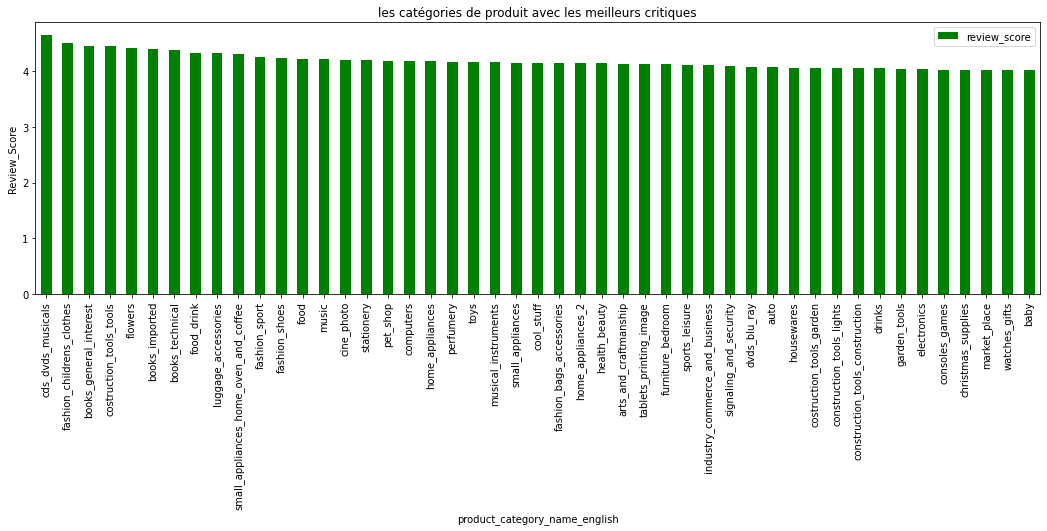

In [ ]:
plot = df1.plot.bar(y='review_score', figsize=(18, 5), title='les catégories de produit avec les meilleurs critiques', color='green')
plt.ylabel("Review_Score")
plt.show()

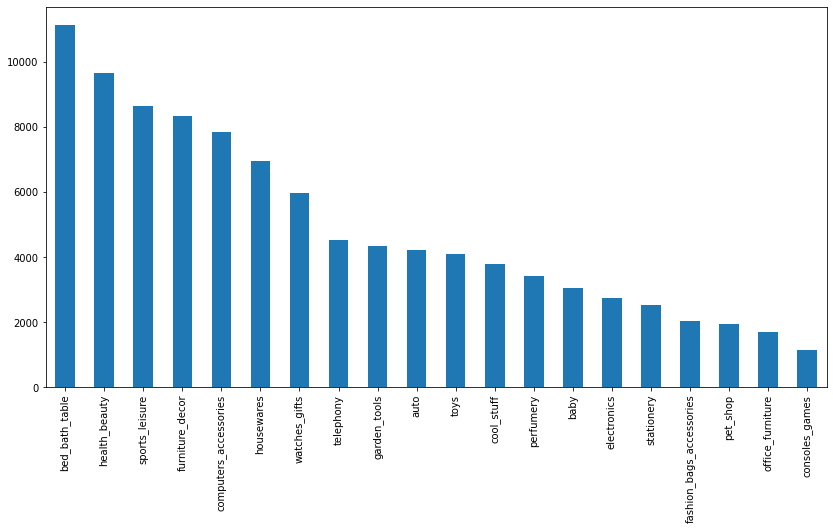

In [ ]:
#Les catégories produits les plus représentées
fig = plt.figure(figsize=(14, 7))
product_review["product_category_name_english"].value_counts().head(20).plot.bar()

In [ ]:
#ici on fait un groupby catégories et compter le nombre de commantair
review=pd.DataFrame(product_review.groupby("product_category_name_english")["review_score"].count().sort_values(ascending=False))
review

,review_score
product_category_name_english,
bed_bath_table,11137
health_beauty,9645
sports_leisure,8640
furniture_decor,8331
computers_accessories,7849
...,...
arts_and_craftmanship,24
cds_dvds_musicals,14
la_cuisine,13


In [ ]:
review.rename(columns = {'review_score': 'count_review_score'}, inplace=True)
review

,count_review_score
product_category_name_english,
bed_bath_table,11137
health_beauty,9645
sports_leisure,8640
furniture_decor,8331
computers_accessories,7849
...,...
arts_and_craftmanship,24
cds_dvds_musicals,14
la_cuisine,13


In [ ]:
#ici on cherche les review comments > à 200
review200=pd.DataFrame(review.loc[review["count_review_score"]>=200]["count_review_score"].sort_values(ascending=False))
review200

,count_review_score
product_category_name_english,
bed_bath_table,11137
health_beauty,9645
sports_leisure,8640
furniture_decor,8331
computers_accessories,7849
housewares,6943
watches_gifts,5950
telephony,4517
garden_tools,4329


In [ ]:
#les catégories de produit avec les meilleurs scores>4, review>=200
cat_review=pd.merge( review200, df1,on='product_category_name_english')
cat_review

,count_review_score,review_score
product_category_name_english,,
health_beauty,9645,4.142768
sports_leisure,8640,4.107986
housewares,6943,4.055019
watches_gifts,5950,4.019160
garden_tools,4329,4.042735
auto,4213,4.065512
toys,4091,4.158641
cool_stuff,3772,4.146341
perfumery,3421,4.161941


In [ ]:
cat_review.to_csv('catégorie_review')

In [ ]:
cat_review.corr()

,count_review_score,review_score
count_review_score,1.000000,-0.281501
review_score,-0.281501,1.000000
